In [12]:
import timeit
import tqdm
import seaborn as sns
import pandas as pd
%run P3Utils.py

In [19]:
def benchmark(env):
    times = []
    distances = []
    for _ in tqdm(range(100)):
        RRT = RRTSolver(*load_env(env), pgoal=0.05, eps=0.25, max_iter=5000, step_size=0.5)
        tstart = timeit.default_timer()
        RRT.search()
        tend = timeit.default_timer()
        dt = tend-tstart
        
        times.append(dt)
        distances.append(RRT.distance)
        
    return distances, times

In [20]:
Adistances, Atimes = benchmark('A')

100%|██████████| 100/100 [00:03<00:00, 27.69it/s]


In [21]:
B1distances, B1times = benchmark('B1')

100%|██████████| 100/100 [01:12<00:00,  1.38it/s]


In [22]:
B2distances, B2times = benchmark('B2')

100%|██████████| 100/100 [05:02<00:00,  3.02s/it]


In [23]:
df = pd.DataFrame({
    'distance':Adistances + B1distances + B2distances,
    'time': Atimes + B1times + B2times,
    'env': ['A']*100 + ['B1']*100 + ['B2']*100
})

Text(0.5, 0.98, 'RRT Benchmark')

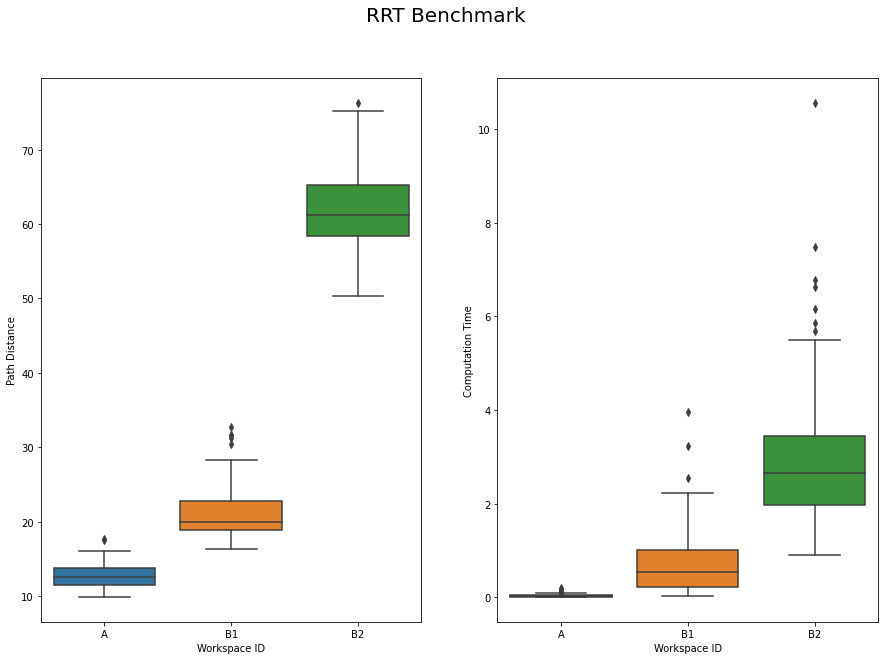

In [30]:
fig, axes = plt.subplots(1,2, figsize=(15,10))
sns.boxplot(x='env',y='distance',data=df, ax=axes[0])
sns.boxplot(x='env',y='time',data=df, ax=axes[1])
axes[0].set_xlabel("Workspace ID")
axes[0].set_ylabel("Path Distance")
axes[1].set_xlabel("Workspace ID")
axes[1].set_ylabel("Computation Time")
fig.suptitle("RRT Benchmark", fontsize=20)